# Mantel Test Example

## Description
The Mantel test evaluates the correlation between two distance matrices by comparing the elements of these matrices. It's commonly used in ecology to test for relationships between different types of distances measured on the same set of objects.

### Mathematical Definition:
The Mantel statistic (r) is calculated as:

# r = Σᵢⱼ [(A_ij - μ_A)(B_ij - μ_B)] / [Σᵢⱼ(A_ij - μ_A)² Σᵢⱼ(B_ij - μ_B)²]^(1/2)

# Where:
- A_ij and B_ij are elements of the two distance matrices
- μ_A and μ_B are their respective means

### When to Use the Mantel Test
The Mantel test is particularly valuable when you need to assess the relationship between two different types of distances or similarities measured on the same set of objects or locations. Common scenarios include:

-In ecology, testing if species compositional distance between sites correlates with geographical distance (isolation by distance)
-In community ecology, examining if community structure correlates with environmental gradients
-In landscape genetics, evaluating if genetic distances between populations correlate with geographical barriers
-In multivariate statistics, assessing if patterns in one multivariate dataset match patterns in another dataset

# Figure 
Shows the mantel test being used to show the correlation between soil chemical parameters and microbial concentration.

![](/BIOM480A5/Figures/manttel.png)

Mantel statistic (r): 0.9544
p-value: 0.0000


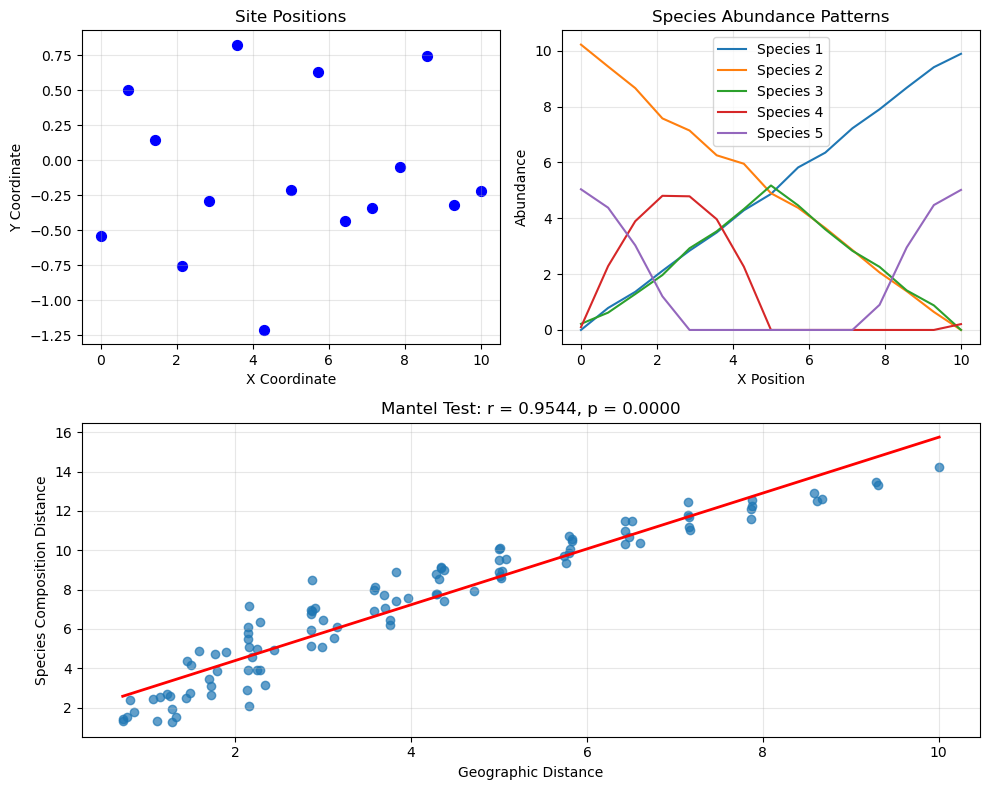

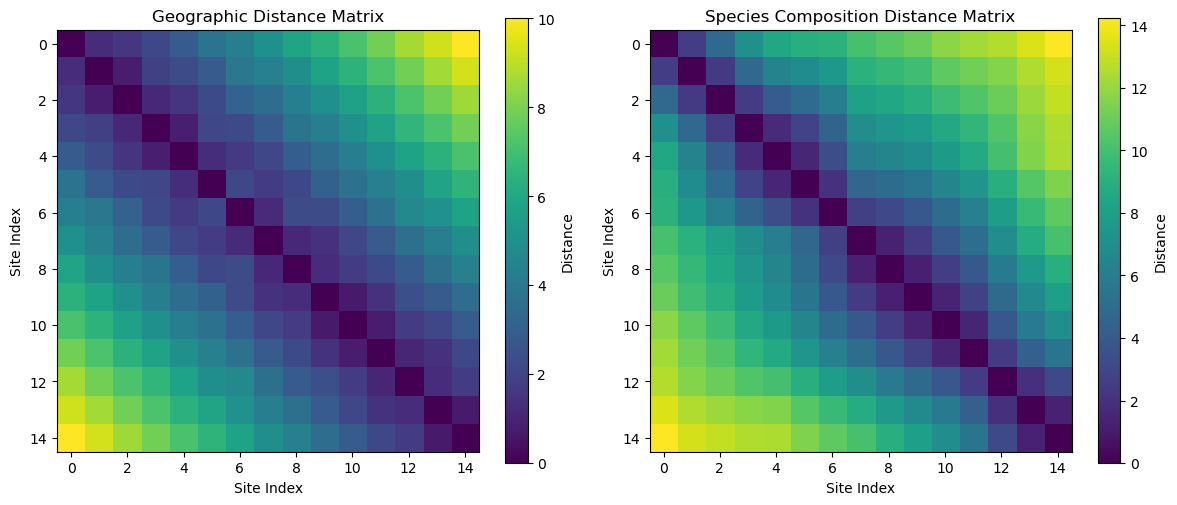

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from BIOM480Tests import mantel_test

# Set random seed for reproducibility
np.random.seed(123)

# Generate coordinates for 15 sites along a line with some noise
n_sites = 15
x_coords = np.linspace(0, 10, n_sites)
y_coords = np.random.normal(0, 0.5, n_sites)  # Small noise component
coordinates = np.column_stack((x_coords, y_coords))

# Create species data that's strongly correlated with x position
species_data = np.zeros((n_sites, 5))  # 5 species
for i in range(n_sites):
    # Make species abundance directly related to position with less noise
    gradient = x_coords[i] / 10.0  # Normalize to 0-1
    species_data[i, 0] = gradient * 10 + np.random.normal(0, 0.1)  # Species 1 increases with x
    species_data[i, 1] = (1 - gradient) * 10 + np.random.normal(0, 0.1)  # Species 2 decreases with x
    species_data[i, 2] = 5 - abs(gradient - 0.5) * 10 + np.random.normal(0, 0.1)  # Species 3 peaks in middle
    species_data[i, 3] = 5 * np.sin(gradient * np.pi * 2) + np.random.normal(0, 0.1)  # Species 4 cycles
    species_data[i, 4] = 5 * np.cos(gradient * np.pi * 2) + np.random.normal(0, 0.1)  # Species 5 cycles

# Ensure all abundances are positive
species_data = np.maximum(species_data, 0)

# Calculate distance matrices
geo_dist = squareform(pdist(coordinates, 'euclidean'))
species_dist = squareform(pdist(species_data, 'euclidean'))

# Perform Mantel test
r, p_value = mantel_test(geo_dist, species_dist, permutations=999, random_state=123)

print(f"Mantel statistic (r): {r:.4f}")
print(f"p-value: {p_value:.4f}")

# Visualize the relationship
plt.figure(figsize=(10, 8))

# Create a subplot for the site positions
plt.subplot(221)
plt.scatter(coordinates[:, 0], coordinates[:, 1], c='blue', s=50)
plt.title('Site Positions')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True, alpha=0.3)

# Create a subplot for species abundance patterns
plt.subplot(222)
for i in range(5):
    plt.plot(x_coords, species_data[:, i], label=f'Species {i+1}')
plt.title('Species Abundance Patterns')
plt.xlabel('X Position')
plt.ylabel('Abundance')
plt.legend()
plt.grid(True, alpha=0.3)

# Create a subplot for the Mantel test correlation
plt.subplot(212)
indices = np.triu_indices(n_sites, k=1)
x = geo_dist[indices]
y = species_dist[indices]

plt.scatter(x, y, alpha=0.7)
# Add a trend line using linear regression
z = np.polyfit(x, y, 1)
poly_line = np.poly1d(z)
plt.plot(sorted(x), poly_line(sorted(x)), 'r-', linewidth=2)

plt.xlabel('Geographic Distance')
plt.ylabel('Species Composition Distance')
plt.title(f'Mantel Test: r = {r:.4f}, p = {p_value:.4f}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Visualize the distance matrices as heatmaps
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.imshow(geo_dist, cmap='viridis')
plt.colorbar(label='Distance')
plt.title('Geographic Distance Matrix')
plt.xlabel('Site Index')
plt.ylabel('Site Index')

plt.subplot(122)
plt.imshow(species_dist, cmap='viridis')
plt.colorbar(label='Distance')
plt.title('Species Composition Distance Matrix')
plt.xlabel('Site Index')
plt.ylabel('Site Index')

plt.tight_layout()
plt.show()